In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd

In [83]:
# Data from kaggle Titanic competition
train_df = pd.read_csv('data/train.csv')  # train set
test_df = pd.read_csv('data/test.csv')   # test  set
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

In [84]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
X["Age"].fillna(X.Age.mean(), inplace=True)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [87]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [88]:
model.oob_score_

0.1361695005913669

In [89]:
y_oob = model.oob_prediction_
print("c-stat: ", roc_auc_score(y, y_oob))

c-stat:  0.73995515504


In [90]:
# describe objects
X.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mack, Mrs. (Mary)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [91]:
X.drop(["Name", "Ticket", "PassengerId", "Parch"], axis=1, inplace=True)

In [92]:
# first letter of cabin
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
    
X["Cabin"] = X.Cabin.apply(clean_cabin)

In [93]:
categorial_variables = ["Sex", "Cabin", "Embarked"]

for variable in categorial_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [94]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print("C-stat: ", roc_auc_score(y, model.oob_prediction_))

C-stat:  0.865787343282


In [95]:
# Variable Importance measures
model.feature_importances_

array([  9.12074602e-02,   2.46984034e-01,   4.73847172e-02,
         2.23899970e-01,   1.55781139e-01,   1.47375082e-01,
         2.84323202e-03,   3.53404020e-03,   5.91966977e-03,
         4.16794234e-03,   8.73328868e-03,   9.57042886e-04,
         7.14562953e-04,   2.70678793e-02,   1.48321454e-04,
         1.06803132e-02,   0.00000000e+00,   6.07022450e-03,
         1.65310800e-02])

G:\Users\Av\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


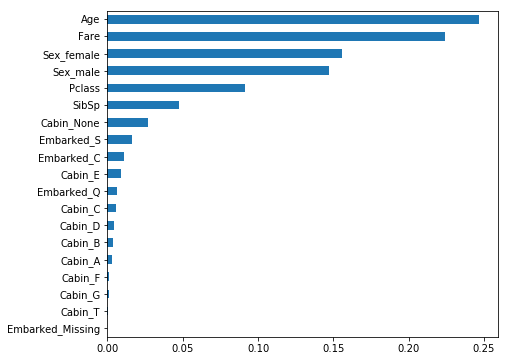

In [96]:
%matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6))

In [97]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    if autoscale:
        x_scale = model.feature_importances_.max() + headroom
    else: 
        x_scale = 1
    
    feature_dict = dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i)
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)
            
            feature_dict[col_name] = sum_value
            
    results = pd.Series(list(feature_dict.values()), index=feature_dict.keys())
    results.sort(axis=1)
    
    results.plot(kind="barh", figsize=(width, len(results) / 4), xlim=(0, x_scale))

In [ ]:
graph_feature_importances(model, X.columns, summarized_columns=categorial_variables)
# Parameter tests
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
%timeit model.fit(X, y)

In [99]:
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42)
% timeit model.fit(X, y)

ValueError: labels ['PassengerId'] not contained in axis

In [29]:
# n-estimators
from sklearn.model_selection import GridSearchCV
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

param_grid = dict(n_estimators=n_estimator_options)
grid = GridSearchCV(RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=42), param_grid, cv=10, scoring="roc_auc", verbose=1, n_jobs=-1)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_, grid.best_estimator_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   34.5s finished


0.863594705386 {'n_estimators': 1000} RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)


G:\Users\Av\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


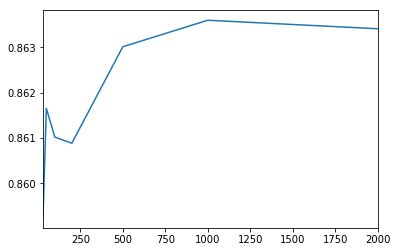

In [30]:
means = [x[1] for x in grid.grid_scores_]
pd.Series(means, n_estimator_options).plot()

In [31]:
# max features
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]
param_grid = dict(max_features=max_features_options)
grid = GridSearchCV(RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42), param_grid, cv=10, scoring="roc_auc", n_jobs=-1)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_, grid.best_estimator_)

0.865892309834 {'max_features': 0.9} RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.9, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)


[mean: 0.86359, std: 0.03849, params: {'max_features': 'auto'}, mean: 0.86359, std: 0.03849, params: {'max_features': None}, mean: 0.86584, std: 0.03465, params: {'max_features': 'sqrt'}, mean: 0.86584, std: 0.03465, params: {'max_features': 'log2'}, mean: 0.86589, std: 0.03758, params: {'max_features': 0.9}, mean: 0.86389, std: 0.03404, params: {'max_features': 0.2}]


G:\Users\Av\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
G:\Users\Av\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


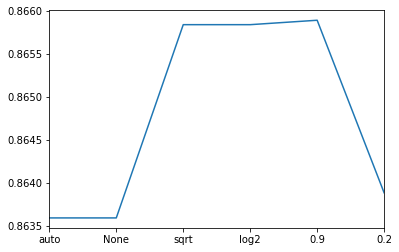

In [32]:
print(grid.grid_scores_)
means = [x[1] for x in grid.grid_scores_]
pd.Series(means, max_features_options).plot()

In [34]:
# min samples leaf
min_samples_options = range(1, 10)
param_grid = dict(min_samples_leaf=min_samples_options)
grid = GridSearchCV(RandomForestRegressor(n_estimators=1000, max_features=0.9, oob_score=True, n_jobs=-1, random_state=42), param_grid, cv=10, scoring="roc_auc", n_jobs=-1)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_, grid.best_estimator_)

0.872142808916 {'min_samples_leaf': 4} RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.9, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)


[mean: 0.86589, std: 0.03758, params: {'min_samples_leaf': 1}, mean: 0.87046, std: 0.03934, params: {'min_samples_leaf': 2}, mean: 0.87147, std: 0.04000, params: {'min_samples_leaf': 3}, mean: 0.87214, std: 0.04003, params: {'min_samples_leaf': 4}, mean: 0.87057, std: 0.03996, params: {'min_samples_leaf': 5}, mean: 0.86984, std: 0.03975, params: {'min_samples_leaf': 6}, mean: 0.86900, std: 0.03967, params: {'min_samples_leaf': 7}, mean: 0.86707, std: 0.04072, params: {'min_samples_leaf': 8}, mean: 0.86579, std: 0.04072, params: {'min_samples_leaf': 9}]


G:\Users\Av\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
G:\Users\Av\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


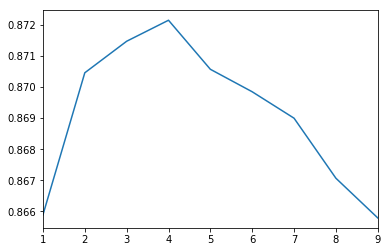

In [35]:
print(grid.grid_scores_)
means = [x[1] for x in grid.grid_scores_]
pd.Series(means, min_samples_options).plot()

In [71]:
# final model
model = RandomForestRegressor(n_estimators=1000, max_features=0.9, min_samples_leaf=4, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print("C-stat: ", roc)

C-stat:  0.874450090009


In [38]:
from sklearn.metrics import accuracy_score
#accuracy_score(y, model.)
print(model.oob_prediction_)
len(model.oob_prediction_)

[  7.96394679e-02   9.65725688e-01   3.89075256e-01   9.71807121e-01
   3.58563624e-02   2.35808131e-01   2.35452780e-01   4.63306100e-01
   5.15372726e-01   9.89183935e-01   6.73374595e-01   7.87007309e-01
   2.09345629e-01   8.25391905e-02   7.80659718e-01   8.46564543e-01
   2.83673119e-01   5.44148585e-02   7.02540971e-01   6.64563667e-01
   7.30017227e-02   1.25814493e-01   6.44155963e-01   3.25703969e-01
   3.99416962e-01   3.06070507e-02   4.66087198e-02   3.19830856e-01
   8.18624692e-01   4.41684052e-03   2.34746906e-01   9.51827837e-01
   7.11401093e-01   1.80160530e-01   2.11621086e-01   3.31266466e-01
   2.63029454e-03   6.13059011e-02   4.28433127e-01   5.00740234e-01
   3.01756385e-01   9.57963512e-01   1.66342604e-01   9.13994445e-01
   7.12091675e-01   2.17582652e-02   1.71343263e-01   7.06938980e-01
   4.13629070e-01   4.32218424e-01   9.69433624e-02   2.01332615e-01
   9.98084509e-01   9.09924883e-01   2.57223812e-01   2.32981490e-01
   8.98378755e-01   2.51698353e-01

891

In [72]:
# lrearning, prediction and printing results
from sklearn.model_selection import cross_val_score


def predict_model(X, Y, model, Xtest, submit_name):
    model.fit(X, Y)
    Y_pred  = model.predict(Xtest)
    #score   = cross_val_score(model, X, Y, cv=cv)

    submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
    submission.to_csv(submit_name, index=False)

    #return score

In [73]:
predict_model(X, y, model, X_test, "test")

ValueError: could not convert string to float: 'C'